## DIGIRISE INFOLABS INTERNSHIP, DECEMBER 2023 - JANUARY 2024

## ML AND DATASCIENCE INTERNSHIP

### PROBLEM STATEMENT : BIGMART SALES PREDICTION

Develop a machine learning model that can accurately predict the sales of various products in BigMart stores based on historical sales data and other relevant attributes such as the type and size of the outlet, location, and visibility. The goal is to use this model to identify key factors that influence sales and to make recommendations for improving sales and profitability. The dataset contains information on various products sold across different outlets and their sales performance over a period of time. Dataset link: https://www.kaggle.com/datasets/jainpooja/fake-news-detection

### SOLUTION

### AUTHOR - ARITRA BAG

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


#### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import gc

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

#### IMPORTING THE DATASET

In [4]:
raw_data_train = pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')
raw_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
raw_data_test = pd.read_csv('/kaggle/input/bigmart-sales-data/Test.csv')
raw_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### EXPLORATORY ANALYSIS OF THE RAW TRAINING DATA

In [6]:
print('\nThe number of null values in the dataset is : \n' + str(raw_data_train.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(raw_data_train.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(raw_data_train.info())
print('\nThe data distribution in the columns is given by :\n')
print(raw_data_train.describe())
print('\nThe number of unique values in the Item_Identifier column is : ' + str(len(raw_data_train['Item_Identifier'].unique())))
print('\nThe number of unique values in the Outlet_Identifier column is : ' + str(len(raw_data_train['Outlet_Identifier'].unique())))
print('\nThe number of unique values in the Item_Weight column is : ' + str(len(raw_data_train['Item_Weight'].unique())))
print('\nThe number of unique values in the Outlet_Size column is : ' + str(len(raw_data_train['Outlet_Size'].unique())))
print('\nThe number of unique values in the Outlet_Establishment_Year column is : ' + str(len(raw_data_train['Outlet_Establishment_Year'].unique())))
print('\nThe number of unique values in the Item_Fat_Content column is : ' + str(len(raw_data_train['Item_Fat_Content'].unique())))
print('\nThe number of unique values in the Outlet_Location_Type column is : ' + str(len(raw_data_train['Outlet_Location_Type'].unique())))
print('\nThe number of unique values in the Outlet_Type column is : ' + str(len(raw_data_train['Outlet_Type'].unique())))
print('\nThe number of unique values in the Item_Visibility column is : ' + str(len(raw_data_train['Item_Visibility'].unique())))
print('\nThe number of unique values in the Item_Type column is : ' + str(len(raw_data_train['Item_Type'].unique())))
print('\nThe number of unique values in the Item_MRP column is : ' + str(len(raw_data_train['Item_MRP'].unique())))
print('\nThe number of unique values in the Item_Outlet_Sales column is : ' + str(len(raw_data_train['Item_Outlet_Sales'].unique())))


The number of null values in the dataset is : 
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   f

#### TRAINING DATA CLEANING

In [7]:
train_data = raw_data_train
#train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
#train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode())
train_data = train_data.dropna(subset = ['Item_Weight'], axis = 0)
train_data.reset_index(inplace = True) 
train_data = train_data.dropna(subset = ['Outlet_Size'], axis = 0)
train_data.reset_index(inplace = True) 
train_data['Outlet_Age'] = 2023 - (train_data['Outlet_Establishment_Year'])

In [8]:
train_data = train_data.drop(['level_0'], axis = 1)
train_data = train_data.drop(['index'], axis = 1)
cleaned_data = train_data

#### TRAINING DATA PREPROCESSING

In [9]:
train_data = train_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)
train_data = train_data.drop(['Outlet_Establishment_Year'], axis = 1)

In [10]:
### Encoding Item_Fat_Content Values
fat_content_encoder = LabelEncoder()
train_data['Item_Fat_Content'] = fat_content_encoder.fit_transform(train_data['Item_Fat_Content'])

### Encoding Item_Type Values
item_type_encoder = LabelEncoder()
train_data['Item_Type'] = item_type_encoder.fit_transform(train_data['Item_Type'])

### Encoding Outlet_Size  Values
outlet_size_encoder = LabelEncoder()
train_data['Outlet_Size'] = outlet_size_encoder.fit_transform(train_data['Outlet_Size'])

### Encoding Outlet_Location Values
location_encoder = LabelEncoder()
train_data['Outlet_Location_Type'] = location_encoder.fit_transform(train_data['Outlet_Location_Type'])

### Encoding Outlet_Type Values
type_encoder = LabelEncoder()
train_data['Outlet_Type'] = type_encoder.fit_transform(train_data['Outlet_Type'])

### Scaling Item_Weight Values
weight_scaler = MinMaxScaler()
train_data['Item_Weight'] = weight_scaler.fit_transform(np.array(train_data['Item_Weight']).reshape(-1,1))

### Scaling Item_Visibility Values
visibility_scaler = MinMaxScaler()
train_data['Item_Visibility'] = visibility_scaler.fit_transform(np.array(train_data['Item_Visibility']).reshape(-1,1))

### Scaling Item_MRP Values
mrp_scaler = MinMaxScaler()
train_data['Item_MRP'] = mrp_scaler.fit_transform(np.array(train_data['Item_MRP']).reshape(-1,1))

### Scaling Item_Outlet_Sales Values
sales_scaler = MinMaxScaler()
train_data['Item_Outlet_Sales'] = sales_scaler.fit_transform(np.array(train_data['Item_Outlet_Sales']).reshape(-1,1))

### Scaling Outlet_Age Values
age_scaler = MinMaxScaler()
train_data['Outlet_Age'] = age_scaler.fit_transform(np.array(train_data['Outlet_Age']).reshape(-1,1))

In [11]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,0.282525,1,0.085212,4,0.927446,1,0,0,0.359846,0.454545
1,0.081274,2,0.102368,14,0.071280,1,2,1,0.036730,0.000000
2,0.770765,1,0.088997,10,0.467837,1,0,0,0.199072,0.454545
3,0.260494,1,0.000000,9,0.095036,0,2,0,0.090844,1.000000
4,0.347723,2,0.000000,0,0.084583,1,2,1,0.047840,0.000000


In [12]:
train_data.tail()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
4645,0.964275,4,0.443954,5,0.625925,2,0,0,0.347428,0.545455
4646,0.137541,1,0.301522,13,0.777541,0,2,0,0.265930,1.000000
4647,0.359929,1,0.186840,8,0.227837,2,1,0,0.110320,0.227273
4648,0.158083,2,0.771127,13,0.304349,1,2,1,0.174368,0.000000
4649,0.610003,1,0.238305,14,0.186819,2,0,0,0.068362,0.545455


#### EXPLORATORATORY ANALYSIS OF THE PREPROCESSED DATA

In [13]:
print('\nThe number of null values in the dataset is : \n' + str(train_data.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(train_data.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(train_data.info())
print('\nThe data distribution in the columns is given by :\n')
print(train_data.describe())
print('\nThe number of unique values in the Item_Weight column is : ' + str(len(train_data['Item_Weight'].unique())))
print('\nThe number of unique values in the Outlet_Size column is : ' + str(len(train_data['Outlet_Size'].unique())))
print('\nThe number of unique values in the Item_Fat_Content column is : ' + str(len(train_data['Item_Fat_Content'].unique())))
print('\nThe number of unique values in the Outlet_Location_Type column is : ' + str(len(train_data['Outlet_Location_Type'].unique())))
print('\nThe number of unique values in the Outlet_Type column is : ' + str(len(train_data['Outlet_Type'].unique())))
print('\nThe number of unique values in the Item_Visibility column is : ' + str(len(train_data['Item_Visibility'].unique())))
print('\nThe number of unique values in the Item_Type column is : ' + str(len(train_data['Item_Type'].unique())))
print('\nThe number of unique values in the Item_MRP column is : ' + str(len(train_data['Item_MRP'].unique())))
print('\nThe number of unique values in the Item_Outlet_Sales column is : ' + str(len(train_data['Item_Outlet_Sales'].unique())))


The number of null values in the dataset is : 
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Age              0
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           4650 non-null   float64
 1   Item_Fat_Content      4650 non-null   int64  
 2   Item_Visibility       4650 non-null   float64
 3   Item_Type             4650 non-null   int64  
 4   Item_MRP              4650 non-null   float64
 5   Outlet_Size           4650 non-null   int64  
 6   Outlet_Location_Type  4650 non-null   int64  
 7   Outlet_Type  

Text(0.5, 1.0, 'Boxplot for Outlet_Age')

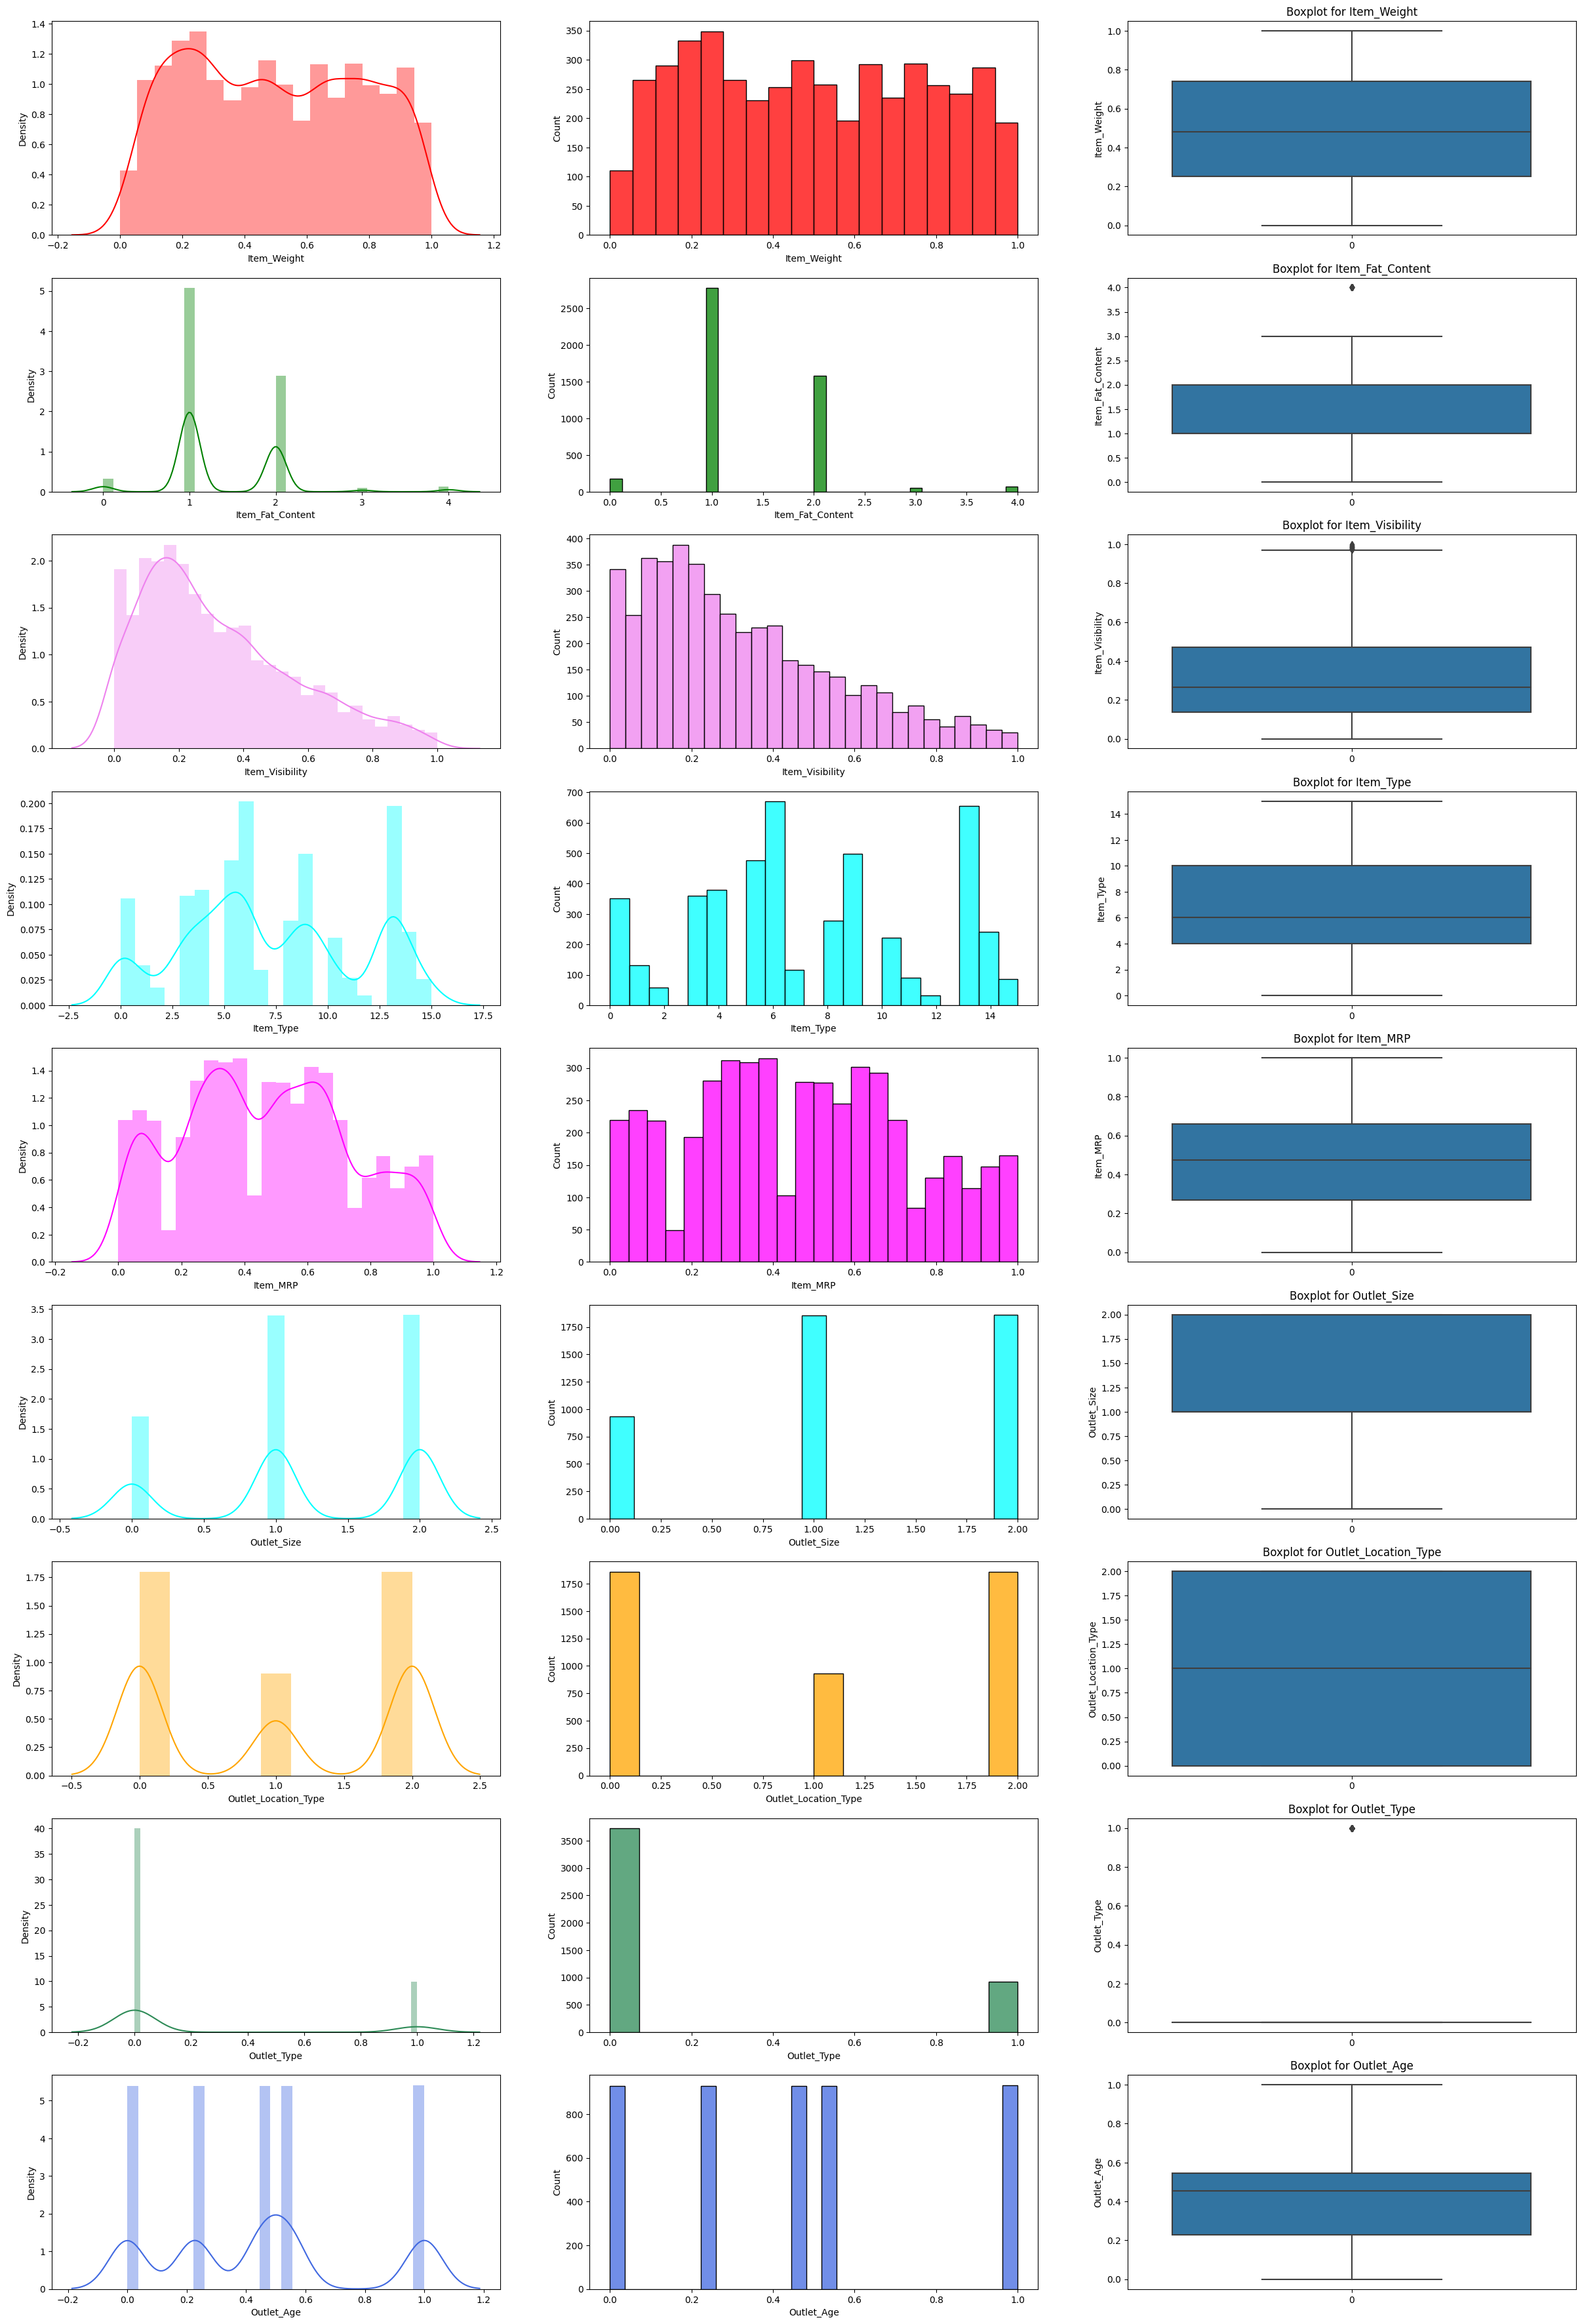

In [14]:
#Data Distribution

plt.figure(figsize = (30,50))
plt.tight_layout(pad = 4.0)

plt.subplot(10,3,1)
sns.distplot(train_data['Item_Weight'],color = 'red')
plt.subplot(10,3,2)
sns.histplot(train_data['Item_Weight'],color = 'red')
plt.subplot(10,3,3)
sns.boxplot(train_data['Item_Weight'])
plt.ylabel('Item_Weight')
plt.title('Boxplot for Item_Weight')

plt.subplot(10,3,4)
sns.distplot(train_data['Item_Fat_Content'],color = 'green')
plt.subplot(10,3,5)
sns.histplot(train_data['Item_Fat_Content'],color = 'green')
plt.subplot(10,3,6)
sns.boxplot(train_data['Item_Fat_Content'])
plt.ylabel('Item_Fat_Content')
plt.title('Boxplot for Item_Fat_Content')

plt.subplot(10,3,7)
sns.distplot(train_data['Item_Visibility'],color = 'violet')
plt.subplot(10,3,8)
sns.histplot(train_data['Item_Visibility'],color = 'violet')
plt.subplot(10,3,9)
sns.boxplot(train_data['Item_Visibility'])
plt.ylabel('Item_Visibility')
plt.title('Boxplot for Item_Visibility')

plt.subplot(10,3,10)
sns.distplot(train_data['Item_Type'],color = 'cyan')
plt.subplot(10,3,11)
sns.histplot(train_data['Item_Type'],color = 'cyan')
plt.subplot(10,3,12)
sns.boxplot(train_data['Item_Type'])
plt.ylabel('Item_Type')
plt.title('Boxplot for Item_Type')

plt.subplot(10,3,13)
sns.distplot(train_data['Item_MRP'],color = 'magenta')
plt.subplot(10,3,14)
sns.histplot(train_data['Item_MRP'],color = 'magenta')
plt.subplot(10,3,15)
sns.boxplot(train_data['Item_MRP'])
plt.ylabel('Item_MRP')
plt.title('Boxplot for Item_MRP')

plt.subplot(10,3,16)
sns.distplot(train_data['Outlet_Size'],color = 'cyan')
plt.subplot(10,3,17)
sns.histplot(train_data['Outlet_Size'],color = 'cyan')
plt.subplot(10,3,18)
sns.boxplot(train_data['Outlet_Size'])
plt.ylabel('Outlet_Size')
plt.title('Boxplot for Outlet_Size')

plt.subplot(10,3,19)
sns.distplot(train_data['Outlet_Location_Type'],color = 'orange')
plt.subplot(10,3,20)
sns.histplot(train_data['Outlet_Location_Type'],color = 'orange')
plt.subplot(10,3,21)
sns.boxplot(train_data['Outlet_Location_Type'])
plt.ylabel('Outlet_Location_Type')
plt.title('Boxplot for Outlet_Location_Type')

plt.subplot(10,3,22)
sns.distplot(train_data['Outlet_Type'],color = 'seagreen')
plt.subplot(10,3,23)
sns.histplot(train_data['Outlet_Type'],color = 'seagreen')
plt.subplot(10,3,24)
sns.boxplot(train_data['Outlet_Type'])
plt.ylabel('Outlet_Type')
plt.title('Boxplot for Outlet_Type')

plt.subplot(10,3,25)
sns.distplot(train_data['Outlet_Age'],color = 'royalblue')
plt.subplot(10,3,26)
sns.histplot(train_data['Outlet_Age'],color = 'royalblue')
plt.subplot(10,3,27)
sns.boxplot(train_data['Outlet_Age'])
plt.ylabel('Outlet_Age')
plt.title('Boxplot for Outlet_Age')

Text(0.5, 1.0, 'Boxplot for Item_Outlet_Sales')

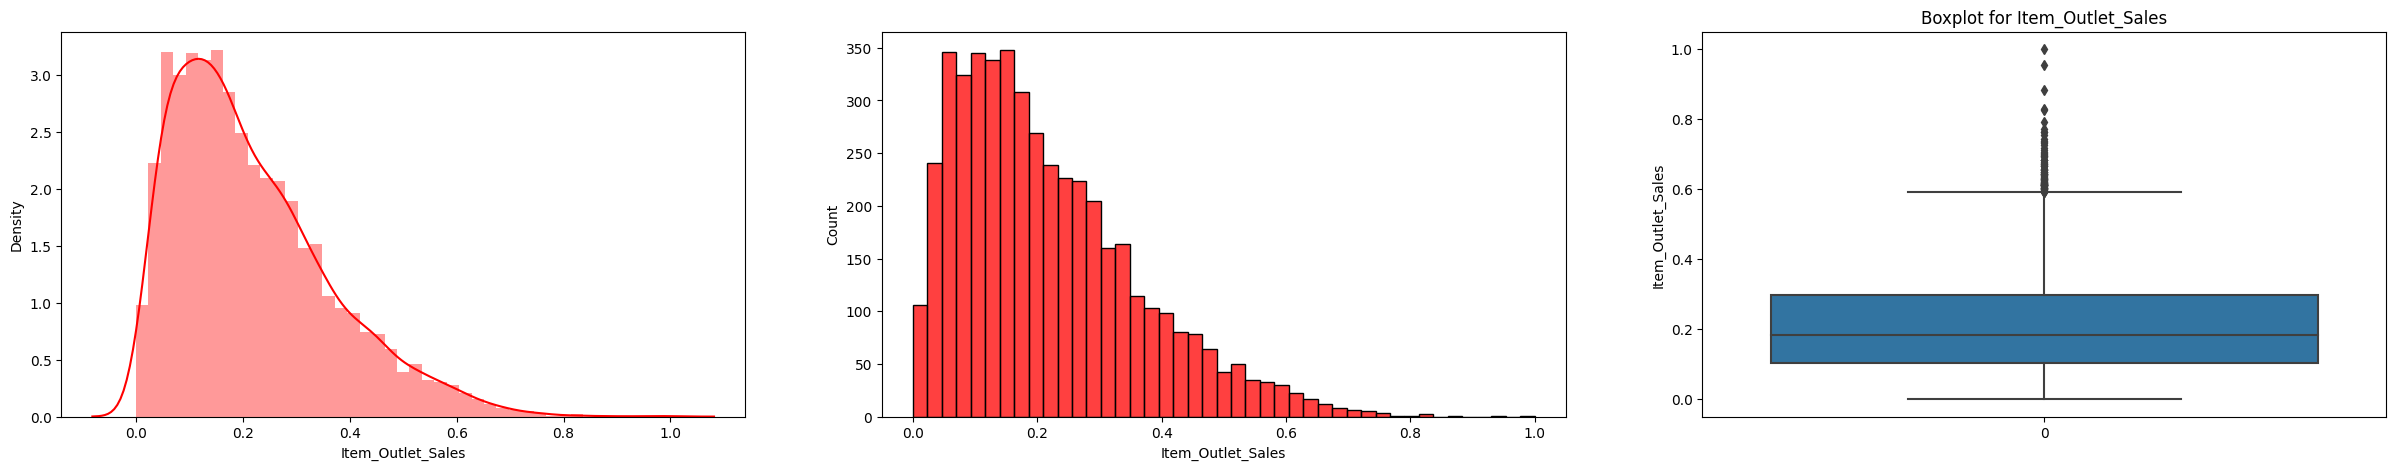

In [15]:
plt.figure(figsize = (30,5))
plt.tight_layout(pad = 4.0)

plt.subplot(1,3,1)
sns.distplot(train_data['Item_Outlet_Sales'],color = 'red')
plt.subplot(1,3,2)
sns.histplot(train_data['Item_Outlet_Sales'],color = 'red')
plt.subplot(1,3,3)
sns.boxplot(train_data['Item_Outlet_Sales'])
plt.ylabel('Item_Outlet_Sales')
plt.title('Boxplot for Item_Outlet_Sales')

<Axes: >

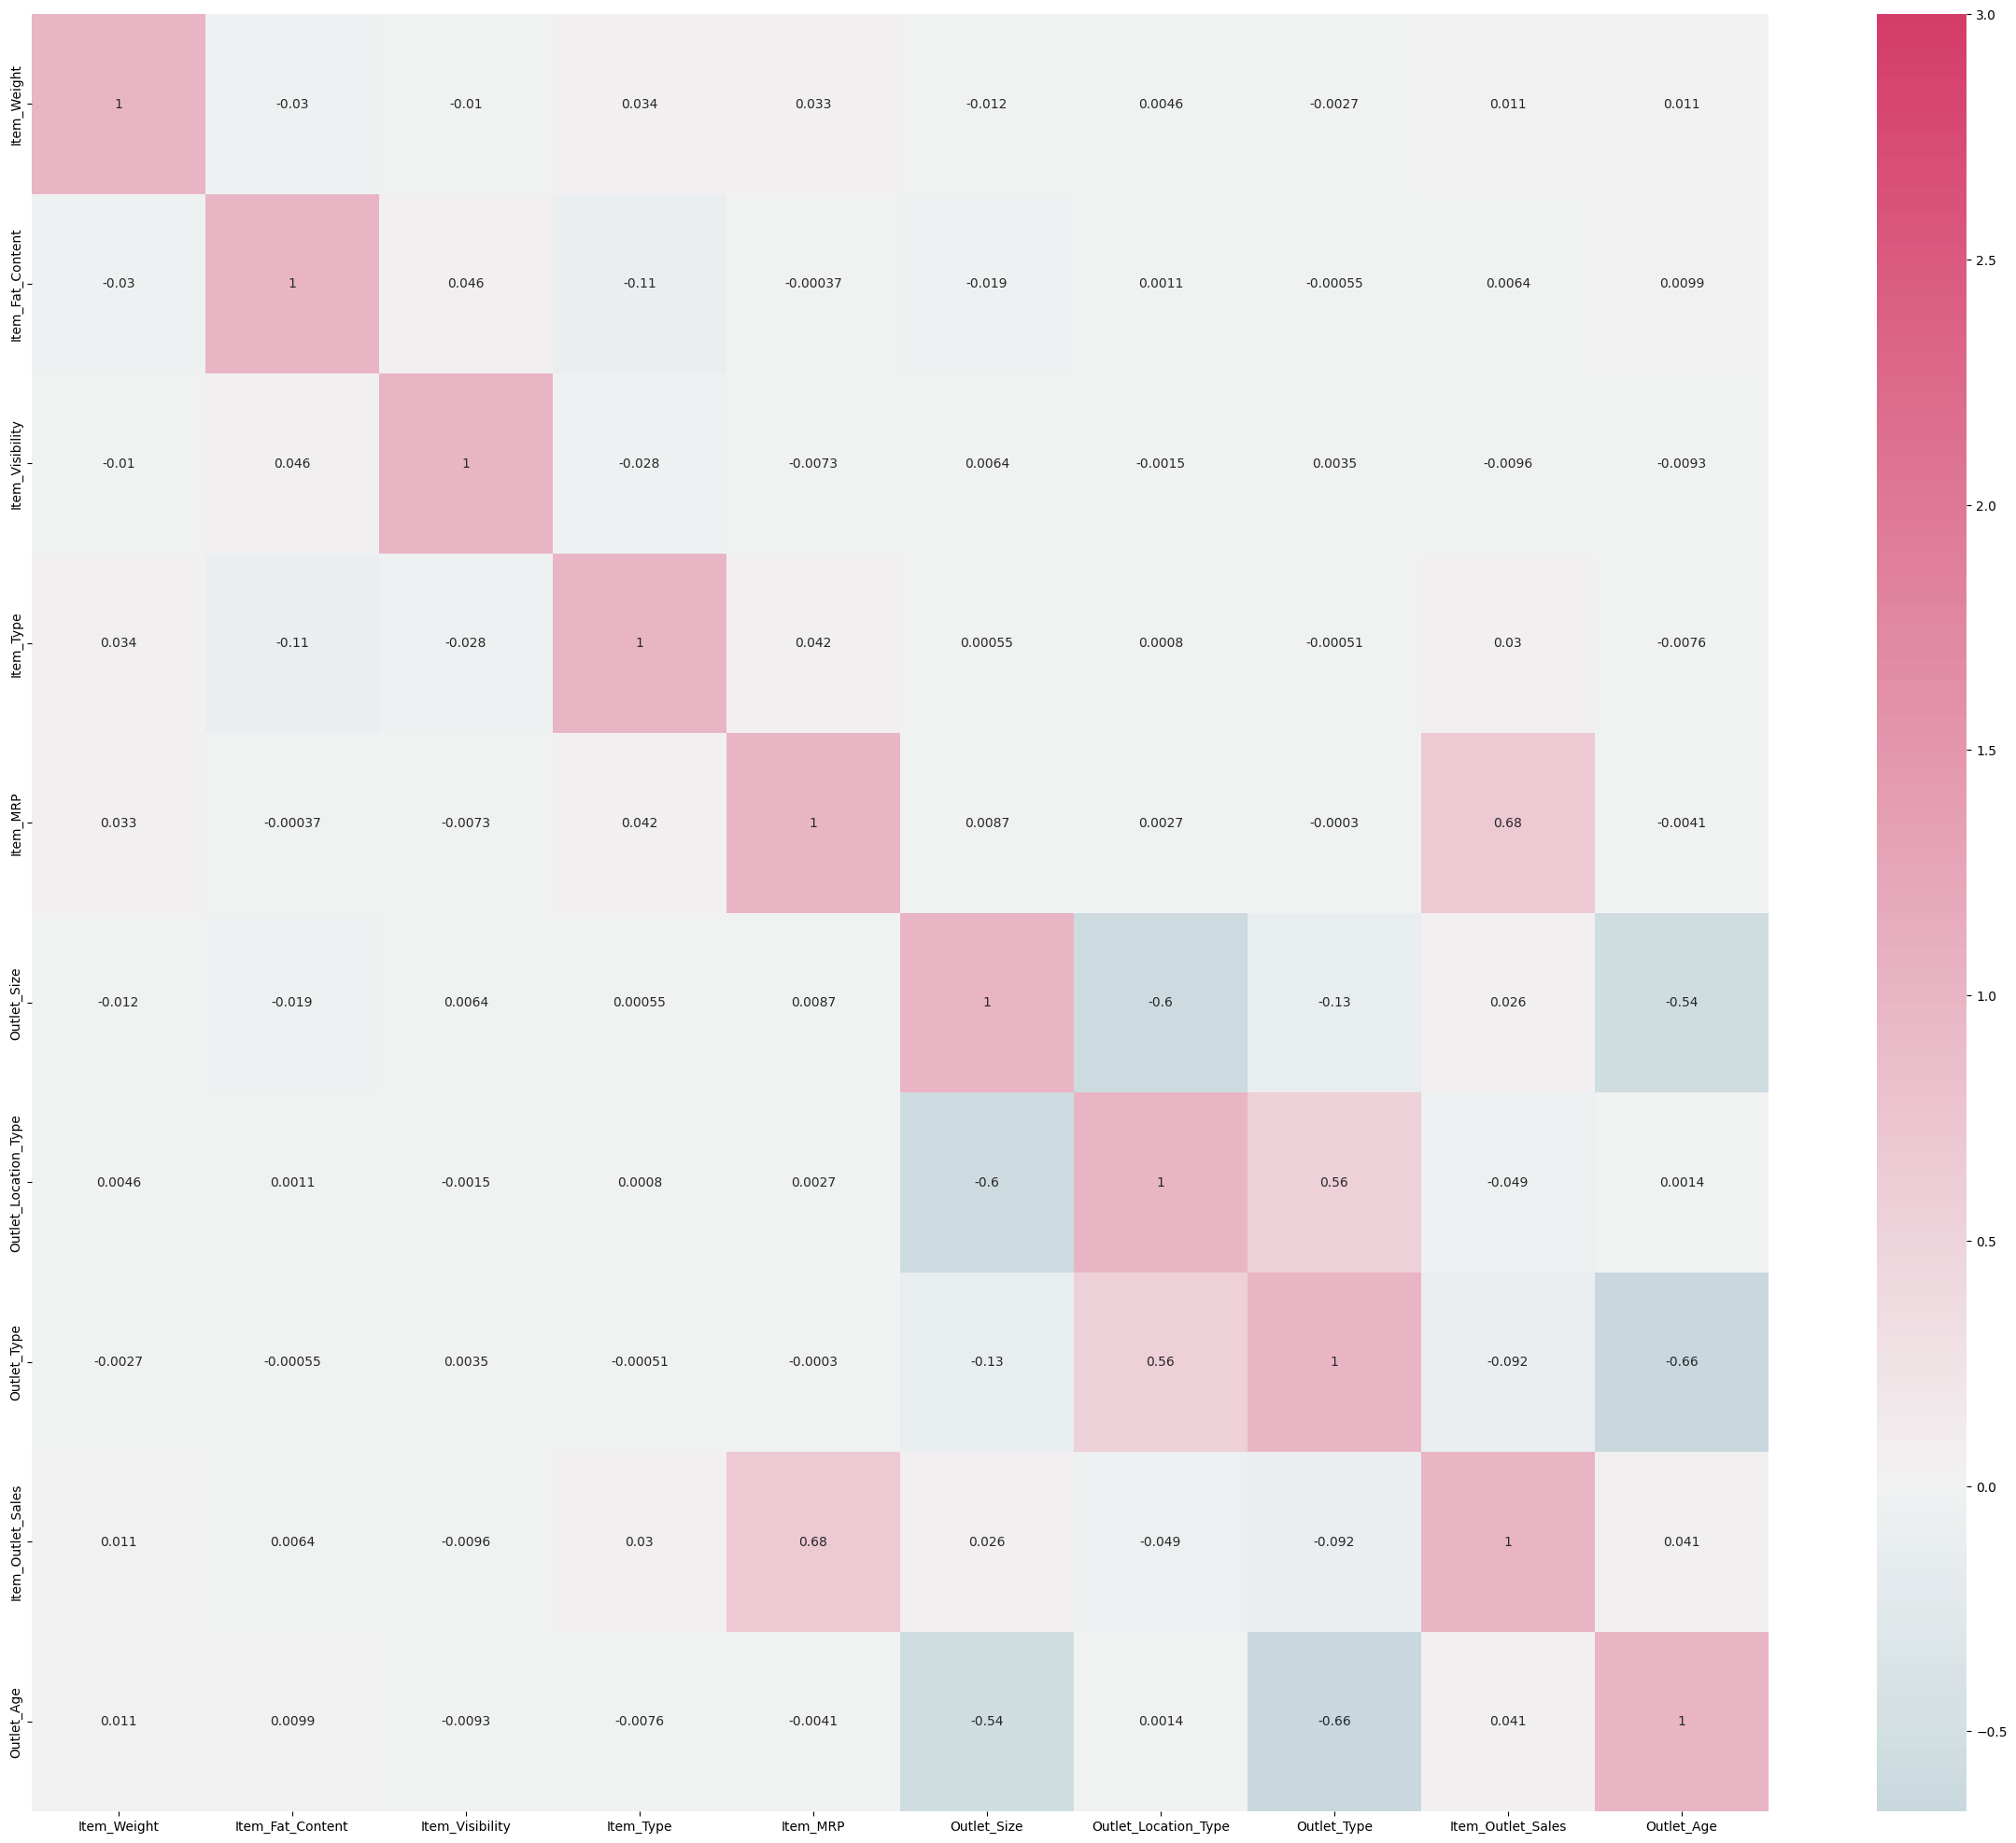

In [16]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (30,25))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(train_data.iloc[:,:].corr(),cmap = cmap, center = 0, vmax = 3,annot = True)

<Figure size 3000x7000 with 0 Axes>

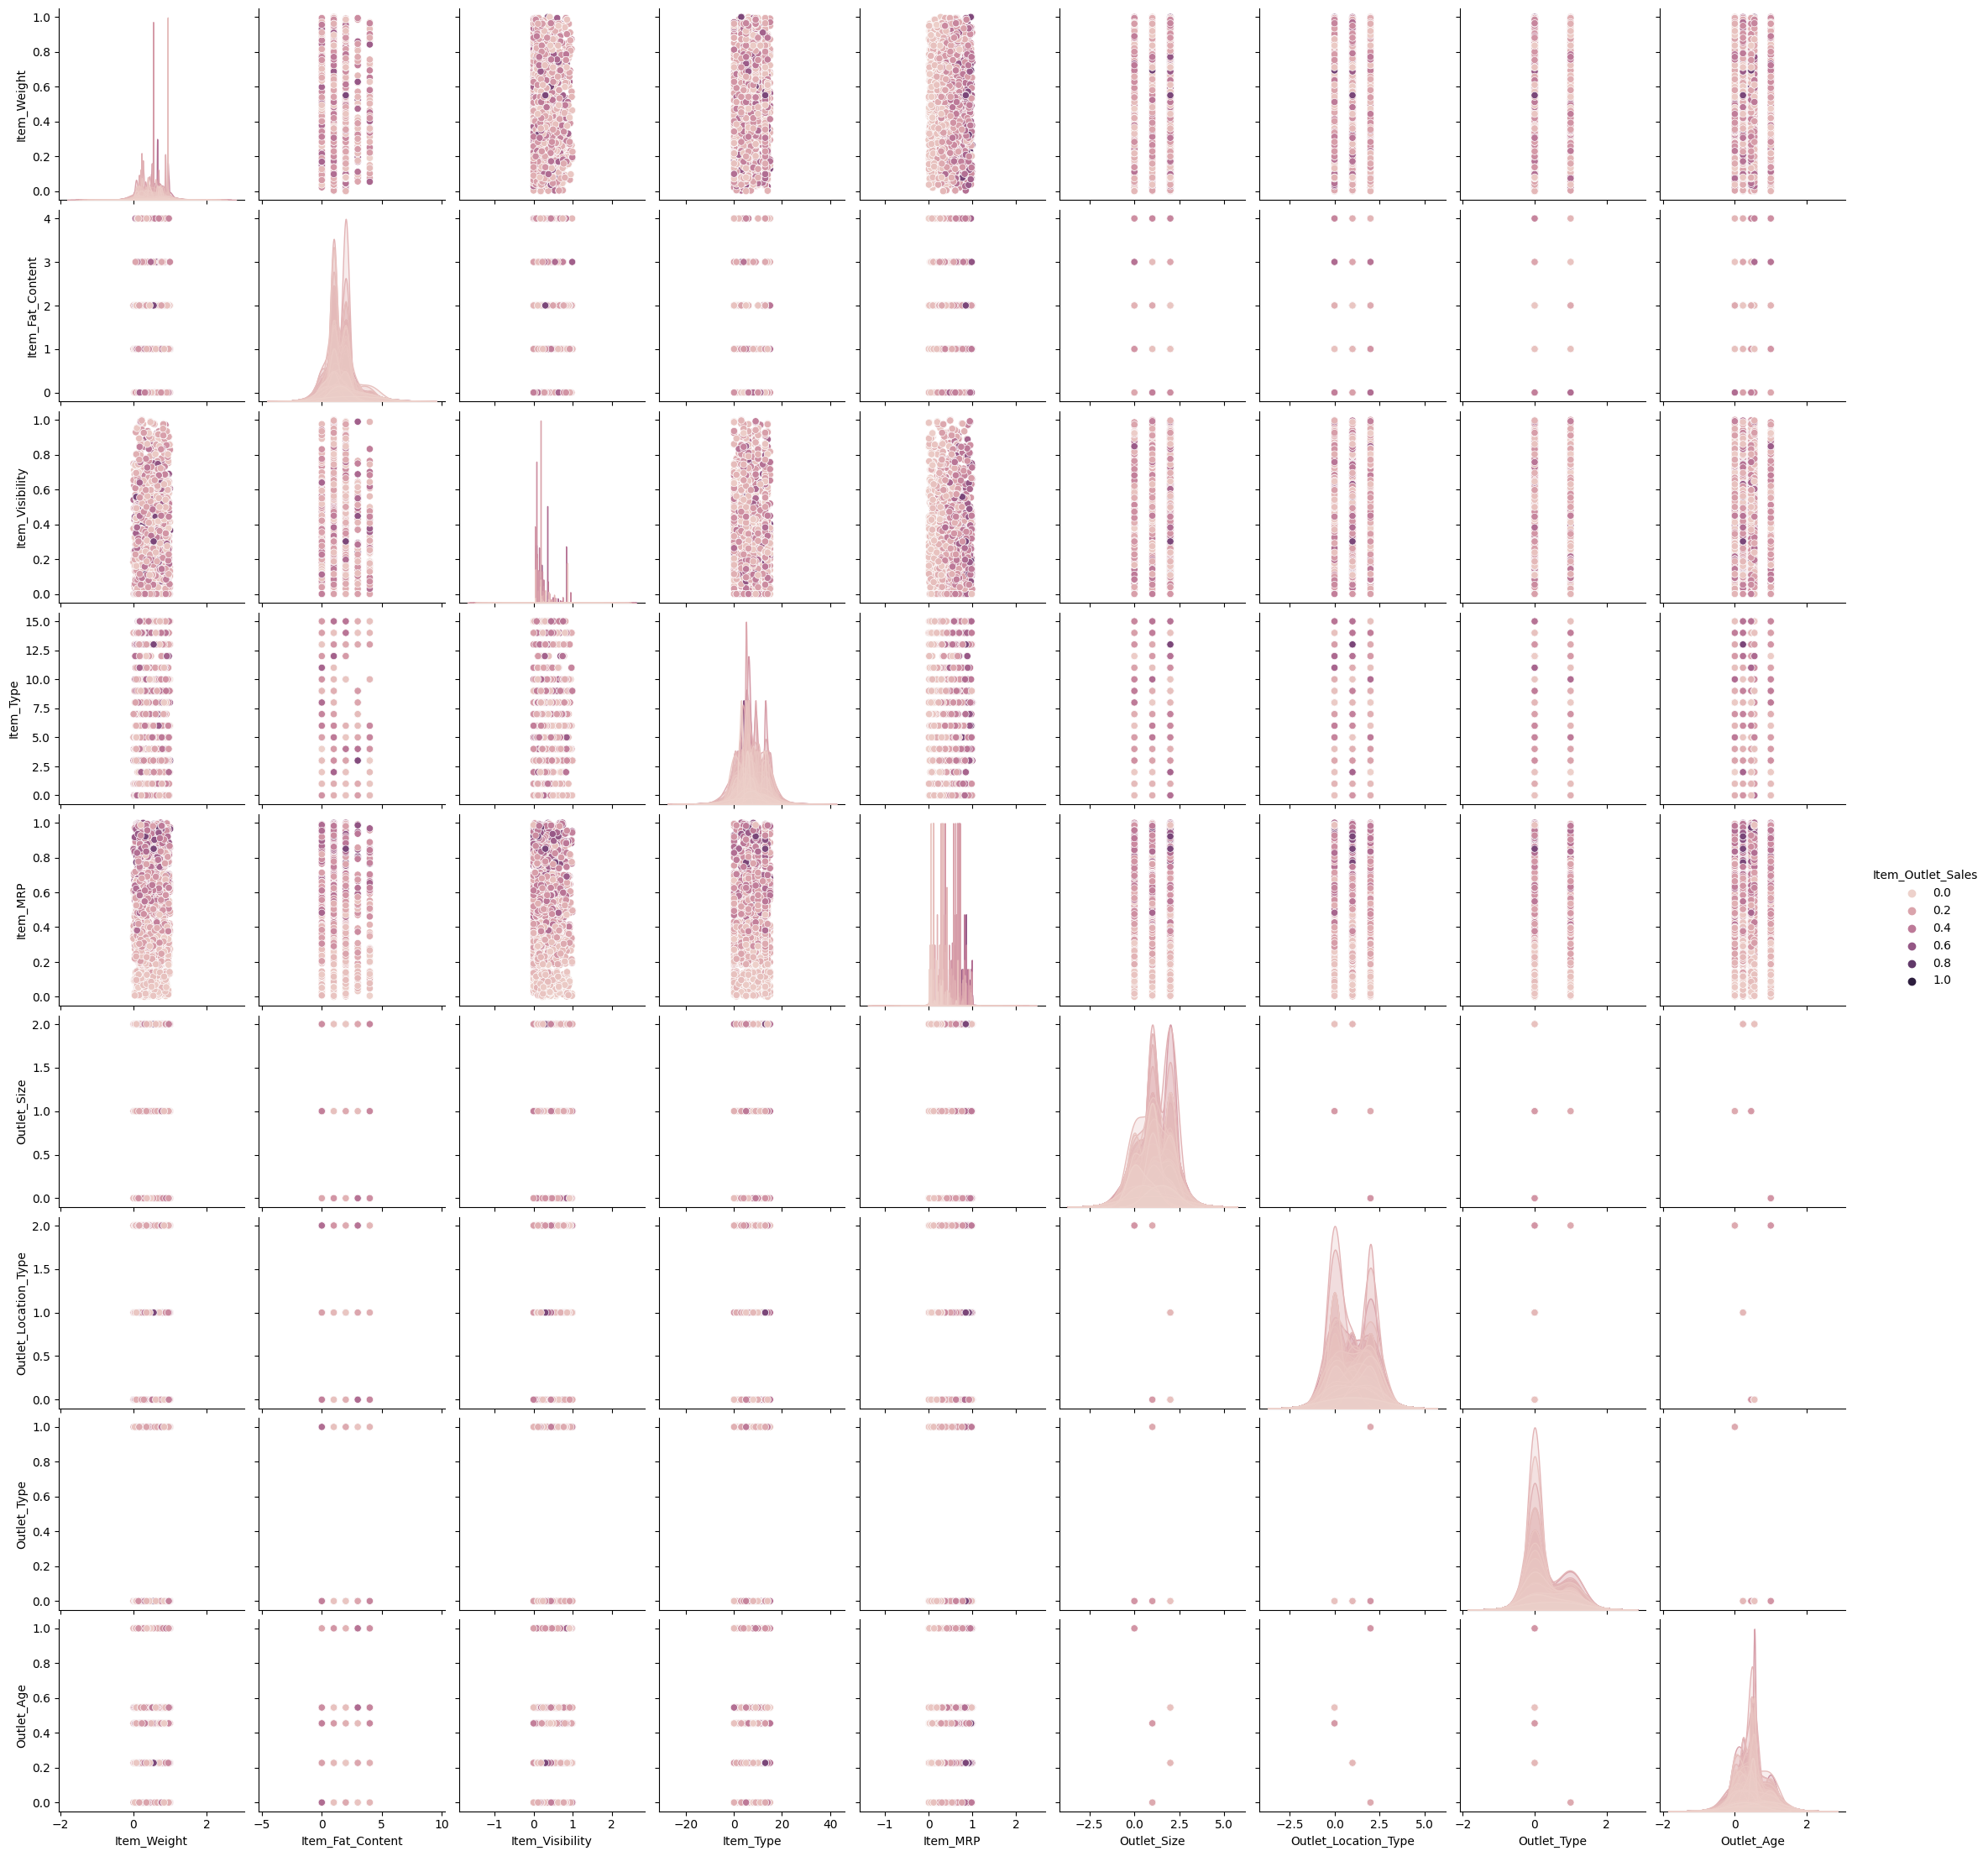

In [17]:
plt.figure(figsize = (30,70))
plt.tight_layout(pad = 3.0)
sns.pairplot(train_data, hue = 'Item_Outlet_Sales')

#### SEPARATING THE FEATURES AND TARGETS

In [18]:
targets = np.array(train_data['Item_Outlet_Sales'])
features_raw = train_data
features_raw = features_raw.drop(['Item_Outlet_Sales'], axis = 1)
features = np.array(features_raw)

#### MODEL SELECTION AND HYPERPARAMETER TUNING

In [19]:
mae = []
mse =[]
r2 = []
regressor = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR()]
for i in range (7):
    for j in range (500):
        x_train, x_test, y_train, y_test = train_test_split (features, targets, random_state = j ,test_size = 0.2, shuffle = True)
        test_regressor = regressor[i]
        test_regressor.fit(x_train,y_train)
        y_predict = test_regressor.predict(x_test)
        mae.append(mean_absolute_error(y_test,y_predict))
        mse.append(mean_squared_error(y_test,y_predict))
        r2.append(r2_score(y_test,y_predict))
        print('Trial run '+str(i+1)+'.'+str(j)+' completed : MAE =  '+str(mean_absolute_error(y_test,y_predict))+ ' MSE =  '+str(mean_squared_error(y_test,y_predict))+' R2 Score =  '+str(r2_score(y_test,y_predict)))

Trial run 1.0 completed : MAE =  0.07908476006208025 MSE =  0.011836194274183939 R2 Score =  0.4708625887377039
Trial run 1.1 completed : MAE =  0.0764157288541048 MSE =  0.010604810303134237 R2 Score =  0.4850109261042592
Trial run 1.2 completed : MAE =  0.07982705930498621 MSE =  0.011922889039068092 R2 Score =  0.48732322967892727
Trial run 1.3 completed : MAE =  0.07791245466288145 MSE =  0.011179851732919289 R2 Score =  0.4900857308994876
Trial run 1.4 completed : MAE =  0.07987924462038853 MSE =  0.011665292981590492 R2 Score =  0.4705566064476082
Trial run 1.5 completed : MAE =  0.07980429670773297 MSE =  0.01162225582559559 R2 Score =  0.45581413063253207
Trial run 1.6 completed : MAE =  0.07710880533917996 MSE =  0.010285047058064016 R2 Score =  0.45221426967394573
Trial run 1.7 completed : MAE =  0.07634066391200778 MSE =  0.010640758812779887 R2 Score =  0.4786774051967665
Trial run 1.8 completed : MAE =  0.07819057509743908 MSE =  0.011024064474402767 R2 Score =  0.47590273

In [20]:
print('Lowest MAE Score = ' + str(min(mae)))
mae_location = int(mae.index(min(mae)))
mae_best_random_state = int(mae_location%500)
mae_regressor = str(regressor[int(mae_location//500)])
print ('Random State = ' + str(mae_best_random_state) + '  Regressor = ' + str(mae_regressor))

print('Lowest MSE Score = ' + str(min(mse)))
mse_location = int(mse.index(min(mse)))
mse_best_random_state = int(mse_location%500)
mse_regressor = str(regressor[int(mse_location//500)])
print ('Random State = ' + str(mse_best_random_state) + '  Regressor = ' + str(mse_regressor))

print('Best R2 Score = ' + str(max(r2)))
r2_location = int(r2.index(max(r2)))
r2_best_random_state = int(r2_location%500)
r2_regressor = str(regressor[int(r2_location//500)])
print ('Random State = ' + str(r2_best_random_state) + '  Regressor = ' + str(r2_regressor))

Lowest MAE Score = 0.0712982130209398
Random State = 92  Regressor = LinearRegression()
Lowest MSE Score = 0.00964092282710155
Random State = 60  Regressor = Ridge()
Best R2 Score = 0.5263484368555794
Random State = 118  Regressor = LinearRegression()


#### MODEL TRAINING

In [21]:
sales_predictor = (regressor[int(mae_location/500)])
x_train, x_test, y_train, y_test = train_test_split (features, targets, random_state = mae_best_random_state ,test_size = 0.15, shuffle = True)
sales_predictor.fit(x_train,y_train)

LinearRegression()

#### MODEL EVALUATION

In [22]:
y_predicted = sales_predictor.predict(x_test)
y_predicted_rescaled = sales_scaler.inverse_transform(y_predicted.reshape(-1,1))
y_test_rescaled = sales_scaler.inverse_transform(y_test.reshape(-1,1))

In [23]:
real_values = np.array(np.round(y_test_rescaled, 4)).tolist()
predicted_values = np.array(np.round(y_predicted_rescaled, 4)).tolist()

df = pd.DataFrame({'Actual Item Outlet Sales': real_values, 'Predicted Outlet Item Sales': predicted_values})
print ('\n')
print(df.head(20))
print('\nThe Mean Absolute Error is : ' + str(mean_absolute_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe Mean Squared Error is : ' + str(mean_squared_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe R2 Score is : ' + str(r2_score (y_test_rescaled, y_predicted_rescaled)))



   Actual Item Outlet Sales Predicted Outlet Item Sales
0                [3815.034]                 [3819.4672]
1               [3516.7556]                 [2688.8763]
2               [3327.6684]                 [3180.2527]
3               [2125.2336]                 [1786.5754]
4                [255.6672]                  [354.8548]
5               [3124.5994]                 [3951.4172]
6               [5367.6796]                  [3001.935]
7               [1221.0772]                  [2846.969]
8                [736.3748]                 [1405.6734]
9               [3600.6464]                 [3677.3415]
10               [3775.086]                 [3005.3526]
11               [657.8104]                  [838.3455]
12               [708.4112]                  [901.6557]
13              [2444.8176]                 [2403.9489]
14               [365.5242]                  [1922.501]
15               [690.4346]                  [793.1453]
16              [1846.9292]                 [1

In [24]:
#Feature Importance
print ('The intercept is : ' + str(sales_predictor.intercept_))
print('\n')
coefficients = pd.concat([pd.DataFrame(features_raw.columns),pd.DataFrame(np.transpose(sales_predictor.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Coefficient_Value']
coefficients = coefficients.sort_values(['Coefficient_Value'], ascending=[False])
print(coefficients)

The intercept is : 0.07275113936964991


                Feature  Coefficient_Value
4              Item_MRP           0.376450
1      Item_Fat_Content           0.001784
6  Outlet_Location_Type           0.001219
3             Item_Type          -0.000186
2       Item_Visibility          -0.003292
0           Item_Weight          -0.005476
5           Outlet_Size          -0.005952
8            Outlet_Age          -0.029875
7           Outlet_Type          -0.053456


#### TRAIN CSV DATA IMPLEMENTATION

In [25]:
targets_predicted = sales_predictor.predict(features)
targets_predicted_resacled = sales_scaler.inverse_transform(targets_predicted.reshape(-1,1))
predictions = (np.round(targets_predicted_resacled, 4)).tolist()
predicted_sales = pd.Series((predictions))

In [26]:
cleaned_data = cleaned_data.reindex(columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',  'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Age','Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size', 'Item_Outlet_Sales'])

In [27]:
dataset_final = pd.concat([cleaned_data,predicted_sales],axis = 1)
dataset_final.columns.values[13] = 'Predicted_Item_Outlet_Sales'
dataset_final['Predicted_Item_Outlet_Sales'] = dataset_final['Predicted_Item_Outlet_Sales'].astype(str)
dataset_final.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Age,Outlet_Location_Type,Outlet_Type,Outlet_Size,Item_Outlet_Sales,Predicted_Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,24,Tier 1,Supermarket Type1,Medium,3735.1380,[4160.192]
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,14,Tier 3,Supermarket Type2,Medium,443.4228,[505.242]
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,24,Tier 1,Supermarket Type1,Medium,2097.2700,[2358.8435]
3,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,36,Tier 3,Supermarket Type1,High,994.7052,[881.9435]
4,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,14,Tier 3,Supermarket Type2,Medium,556.6088,[571.3471]


In [28]:
#saving the final train price data
dataset_final.to_csv('/kaggle/working/Processed_Training_Data.csv', index = False)

#### TEST CSV DATA IMPLEMENTATION

In [29]:
print('\nThe number of null values in the dataset is : \n' + str(raw_data_test.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(raw_data_test.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(raw_data_test.info())
print('\nThe data distribution in the columns is given by :\n')
print(raw_data_test.describe())
print('\nThe number of unique values in the Item_Identifier column is : ' + str(len(raw_data_test['Item_Identifier'].unique())))
print('\nThe number of unique values in the Outlet_Identifier column is : ' + str(len(raw_data_test['Outlet_Identifier'].unique())))
print('\nThe number of unique values in the Item_Weight column is : ' + str(len(raw_data_test['Item_Weight'].unique())))
print('\nThe number of unique values in the Outlet_Size column is : ' + str(len(raw_data_test['Outlet_Size'].unique())))
print('\nThe number of unique values in the Outlet_Establishment_Year column is : ' + str(len(raw_data_test['Outlet_Establishment_Year'].unique())))
print('\nThe number of unique values in the Item_Fat_Content column is : ' + str(len(raw_data_test['Item_Fat_Content'].unique())))
print('\nThe number of unique values in the Outlet_Location_Type column is : ' + str(len(raw_data_test['Outlet_Location_Type'].unique())))
print('\nThe number of unique values in the Outlet_Type column is : ' + str(len(raw_data_test['Outlet_Type'].unique())))
print('\nThe number of unique values in the Item_Visibility column is : ' + str(len(raw_data_test['Item_Visibility'].unique())))
print('\nThe number of unique values in the Item_Type column is : ' + str(len(raw_data_test['Item_Type'].unique())))
print('\nThe number of unique values in the Item_MRP column is : ' + str(len(raw_data_test['Item_MRP'].unique())))


The number of null values in the dataset is : 
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type             

In [30]:
test_data = raw_data_test
#test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())
#test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode())
test_data = test_data.dropna(subset = ['Item_Weight'], axis = 0)
test_data.reset_index(inplace = True) 
test_data = test_data.dropna(subset = ['Outlet_Size'], axis = 0)
test_data.reset_index(inplace = True) 
test_data['Outlet_Age'] = 2023 - (test_data['Outlet_Establishment_Year'])
test_data = test_data.drop(['level_0'], axis = 1)
test_data = test_data.drop(['index'], axis = 1)
test_data_cleaned = test_data
test_data = test_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)
test_data = test_data.drop(['Outlet_Establishment_Year'], axis = 1)

In [31]:
test_data['Item_Fat_Content'] = fat_content_encoder.transform(test_data['Item_Fat_Content'])

test_data['Item_Type'] = item_type_encoder.transform(test_data['Item_Type'])

test_data['Outlet_Size'] = outlet_size_encoder.transform(test_data['Outlet_Size'])

test_data['Outlet_Location_Type'] = location_encoder.transform(test_data['Outlet_Location_Type'])

test_data['Outlet_Type'] = type_encoder.transform(test_data['Outlet_Type'])

test_data['Item_Weight'] = weight_scaler.transform(np.array(test_data['Item_Weight']).reshape(-1,1))

test_data['Item_Visibility'] = visibility_scaler.transform(np.array(test_data['Item_Visibility']).reshape(-1,1))

test_data['Item_MRP'] = mrp_scaler.transform(np.array(test_data['Item_MRP']).reshape(-1,1))

test_data['Outlet_Age'] = age_scaler.transform(np.array(test_data['Outlet_Age']).reshape(-1,1))

In [32]:
features_test = np.array(test_data)
test_targets_predicted = sales_predictor.predict(features_test)
test_targets_predicted_resacled = sales_scaler.inverse_transform(test_targets_predicted.reshape(-1,1))
test_predictions = (np.round(test_targets_predicted_resacled, 4)).tolist()
test_sales = pd.Series((test_predictions))

In [33]:
test_data_cleaned = test_data_cleaned.reindex(columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',  'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Age','Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'])
test_dataset_final = pd.concat([test_data_cleaned,test_sales],axis = 1)
test_dataset_final.columns.values[12] = 'Predicted_Item_Outlet_Sales'
test_dataset_final['Predicted_Item_Outlet_Sales'] = test_dataset_final['Predicted_Item_Outlet_Sales'].astype(str)
test_dataset_final.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Age,Outlet_Location_Type,Outlet_Type,Outlet_Size,Predicted_Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,24,Tier 1,Supermarket Type1,Medium,[1794.0638]
1,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,26,Tier 1,Supermarket Type1,Small,[1914.8508]
2,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,14,Tier 3,Supermarket Type2,Medium,[505.7573]
3,FDU11,4.785,Low Fat,0.092738,Breads,122.3098,OUT049,1999,24,Tier 1,Supermarket Type1,Medium,[2090.0299]
4,DRL59,16.750,LF,0.021206,Hard Drinks,52.0298,OUT013,1987,36,Tier 3,Supermarket Type1,High,[807.9669]


In [34]:
test_dataset_final.to_csv('/kaggle/working/Processed_Test_Data.csv', index = False)